# PLUMMER SPHERE


# Successful trials  

1000 bodies: ./treecode in=treecode_in_4.txt out=treecode_out_4.txt dtime=0.001 eps=%f theta=0.1 tstop=10 dtout=0.1

with $\textbf{one}$ repetition  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import math
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.gridspec as gridspec

# Reading from the output file

In [6]:
filename = "treecode_out_4_2000bodies.txt"

N = 2000

# Counting the number of steps 

n_outputs = 0

with open(filename, "r") as file:
    for line in file:
        if line.strip() == str(N):
            n_outputs += 1
            
print(n_outputs) 

201


In [7]:
# Reading times

data_time = np.empty(n_outputs)
with open(filename, "r") as file:
    index = 0
    for _ in range(n_outputs):
        for i in range(2):
            file.readline()
        
        data_iter_t = np.genfromtxt(file, max_rows=1)
        data_time[index] = data_iter_t
        index += 1
        
        for _ in range(3*N):
            file.readline()

print(data_time.shape)

(201,)


In [8]:
# Reading masses from the output

#data_mass = np.empty(N*n_outputs)
data_mass = []

with open(filename, "r") as file:
    index = 0
    for _ in range(n_outputs):
        for i in range(3):
            file.readline()
        
        data_iter_m = np.genfromtxt(file, max_rows=N)
        data_mass[index:index+N] = data_iter_m
        index += N
        
        for _ in range(2*N):
            file.readline()
print(len(data_mass))

402000


In [5]:
# Reading coordinates and velocities from the output

data_coordinates = []
data_velocities = []

with open(filename, "r") as file:
    for _ in range(n_outputs):
        for _ in range(3+N):
            file.readline()
            
        data_iter_c = np.genfromtxt(file, usecols = range(0,3), delimiter = '', max_rows=N)
        data_coordinates.append(data_iter_c)
        data_iter_v = np.genfromtxt(file, usecols = range(0,3), delimiter = '', max_rows=N)
        data_velocities.append(data_iter_v)
        
data_coordinates = np.concatenate(data_coordinates)
data_velocities = np.concatenate(data_velocities)

print(data_velocities.shape)

(402000, 3)


In [9]:
x = np.zeros(shape = len(data_coordinates))
y = np.zeros(shape = len(data_coordinates))
z = np.zeros(shape = len(data_coordinates))

vx = np.zeros(shape = len(data_velocities))
vy = np.zeros(shape = len(data_velocities))
vz = np.zeros(shape = len(data_velocities))

for i in range(len(data_coordinates)):
    x[i] = data_coordinates[i][0]
    y[i] = data_coordinates[i][1]
    z[i] = data_coordinates[i][2]
    
for i in range(len(data_velocities)):
    vx[i] = data_velocities[i][0]
    vy[i] = data_velocities[i][1]
    vz[i] = data_velocities[i][2]

# 3D Plot

/home/malvi/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


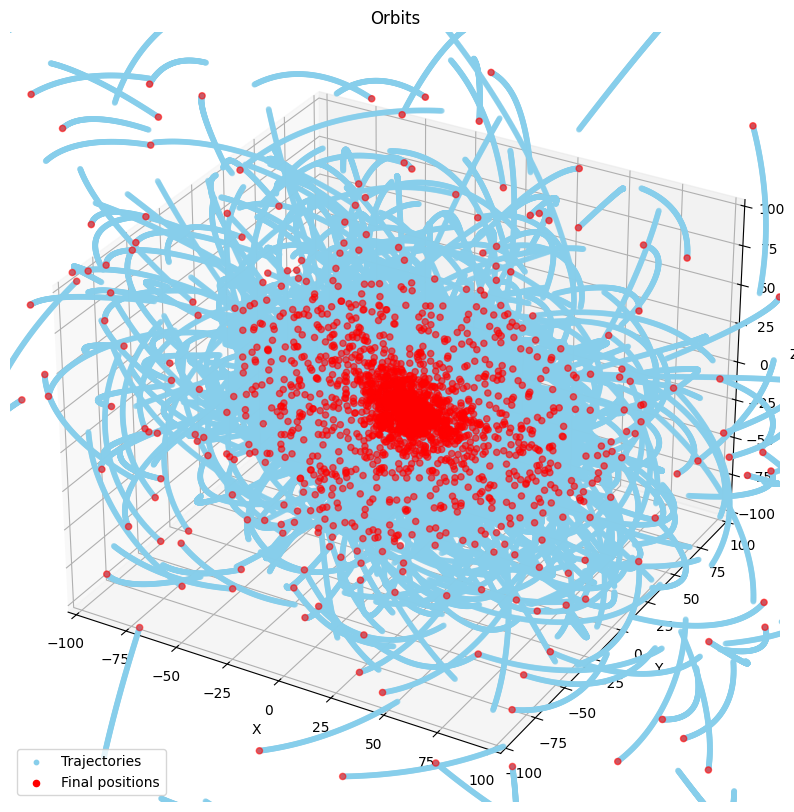

In [10]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
ax.scatter(x, y, z, color='skyblue', s=10, label = 'Trajectories')
#ax.scatter(x[:N], y[:N], z[:N], color='blue')
ax.scatter(x[-N:], y[-N:], z[-N:], color='red', label = 'Final positions')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Orbits')
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)
ax.set_zlim(-100,100)

ax.legend()
plt.show()

201 201


MovieWriter stderr:
convert-im6.q16: no images defined `2000_bodies.gif' @ error/convert.c/ConvertImageCommand/3229.



CalledProcessError: Command '['convert', '-size', '1000x1000', '-depth', '8', '-delay', '10.0', '-loop', '0', 'rgba:-', '-layers', 'OptimizePlus', '2000_bodies.gif']' returned non-zero exit status 1.

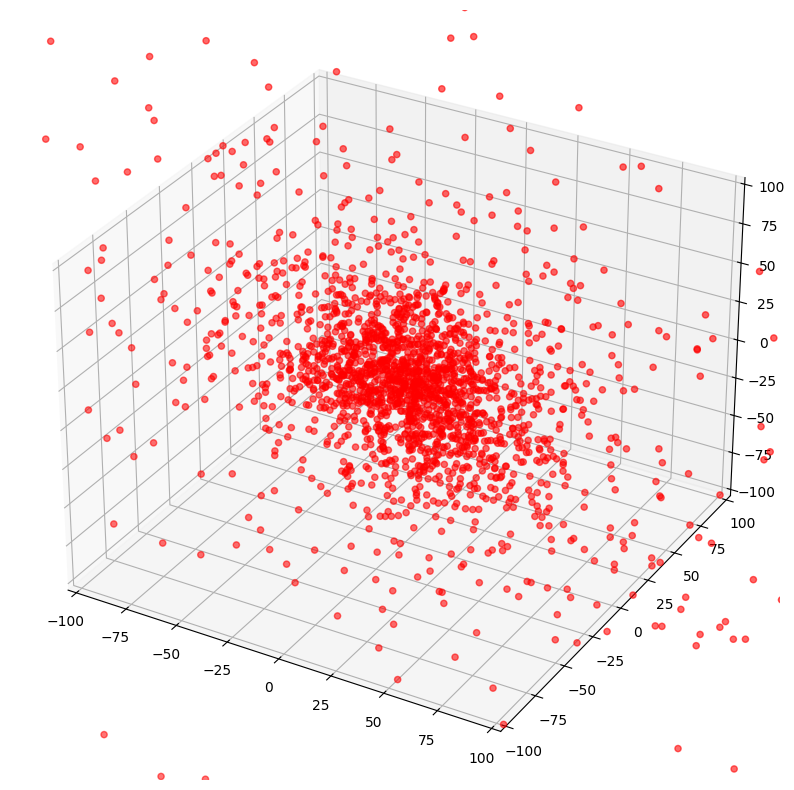

In [34]:
num_frames = len(data_coordinates) // N
print(num_frames, n_outputs)

def update(frame):
    start_idx = frame * N
    end_idx = (frame + 1) * N
    scat._offsets3d = (x[start_idx:end_idx], y[start_idx:end_idx], z[start_idx:end_idx])
    return scat,

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

scat = ax.scatter(x[:len(data_coordinates)], y[:len(data_coordinates)], z[:len(data_coordinates)], c='r', marker='o')

#ax.set_xlim(np.min(x), np.max(x))
#ax.set_ylim(np.min(y), np.max(y))
#ax.set_zlim(np.min(z), np.max(z))

ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_zlim(-100, 100)

ani = FuncAnimation(fig, update, frames=num_frames, interval=200)
ani.save('2000_bodies.gif', writer='imagemagick', fps=10)

plt.show()

Text(0, 0.5, 'j-particle position')

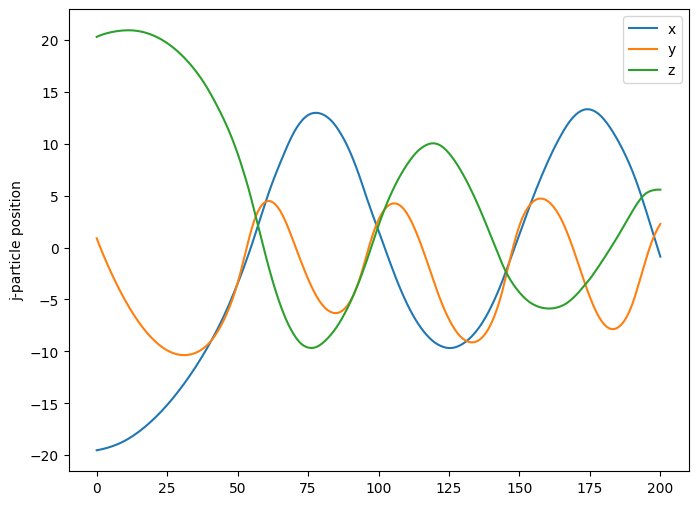

In [11]:
xp = np.zeros(shape=n_outputs)
yp = np.zeros(shape=n_outputs)
zp = np.zeros(shape=n_outputs)

for i in range(n_outputs):
    xp[i] = x[150+i*N]
    yp[i] = y[150+i*N]
    zp[i] = z[150+i*N]

plt.figure(figsize=(8,6))
plt.plot(xp, label = 'x')
plt.plot(yp, label = 'y')
plt.plot(zp, label = 'z')
plt.legend()
plt.ylabel('j-particle position')

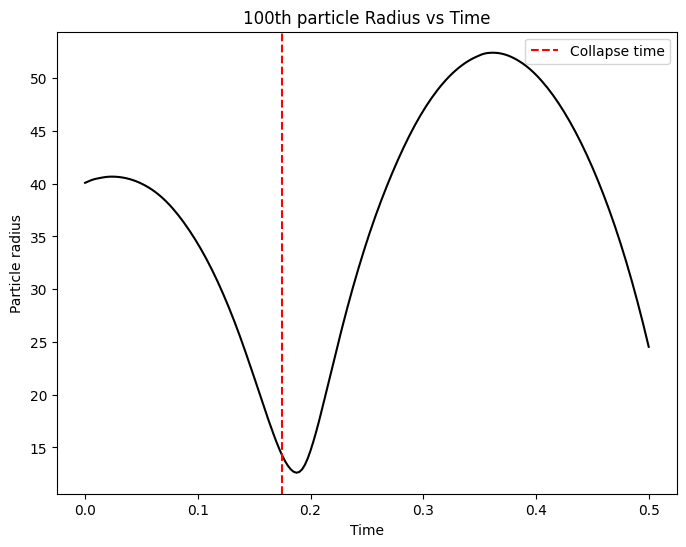

In [12]:
r_p1 = np.zeros(n_outputs)
for i in range(n_outputs):
    r_p1[i] = np.sqrt(x[100+i*N]**2 + y[100+i*N]**2 + z[100+i*N]**2)

time = np.linspace(0, 0.5, len(r_p1))
plt.figure(figsize=(8,6))
plt.plot(time, r_p1, color='black')
plt.axvline(0.175, color='red', linestyle='dashed', label='Collapse time')
plt.xlabel('Time')
plt.ylabel('Particle radius')
plt.title('100th particle Radius vs Time')
plt.legend()
plt.show()

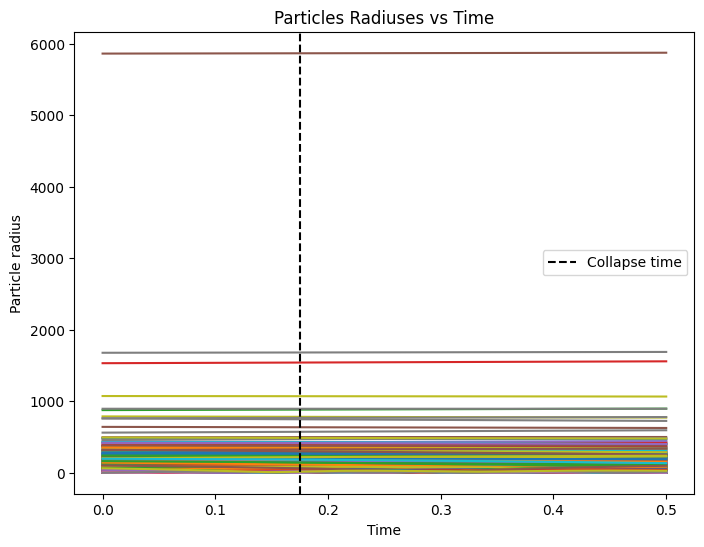

In [13]:
r_ptot = []
for j in range(N):
    r_part = np.zeros(n_outputs)
    
    for i in range(n_outputs):
        r_part[i] = np.sqrt(x[j+i*N]**2 + y[j+i*N]**2 + z[j+i*N]**2)
    r_ptot.append(r_part)

time = np.linspace(0, 0.5, n_outputs)
plt.figure(figsize=(8,6))
for i in range(N):
    plt.plot(time, r_ptot[i])
plt.axvline(0.175, color='black', linestyle='dashed', label='Collapse time')
plt.xlabel('Time')
plt.ylabel('Particle radius')
plt.title('Particles Radiuses vs Time')
plt.legend()
plt.show()

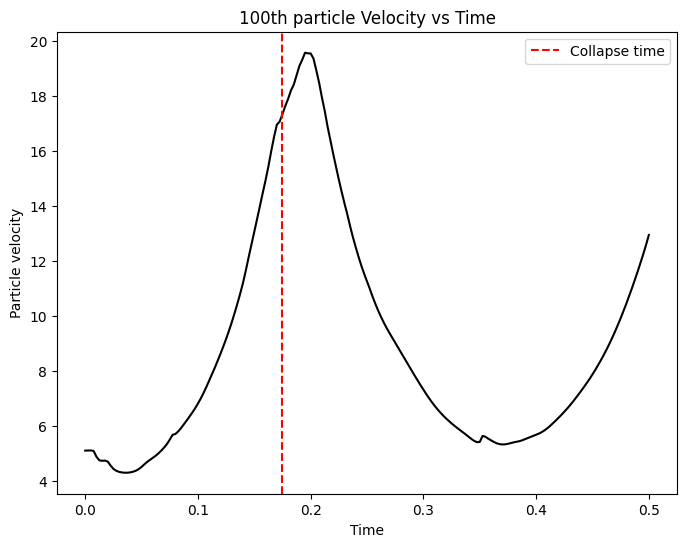

In [14]:
v_p1 = np.zeros(n_outputs)
for i in range(n_outputs):
    v_p1[i] = np.sqrt(vx[100+i*N]**2 + vy[100+i*N]**2 + vz[100+i*N]**2)
    
time = np.linspace(0, 0.5, len(v_p1))
plt.figure(figsize=(8,6))
plt.plot(time, v_p1, color='black')
plt.axvline(0.175, color='red', linestyle='dashed', label='Collapse time')
plt.xlabel('Time')
plt.ylabel('Particle velocity')
plt.title('100th particle Velocity vs Time')
plt.legend()
plt.show()

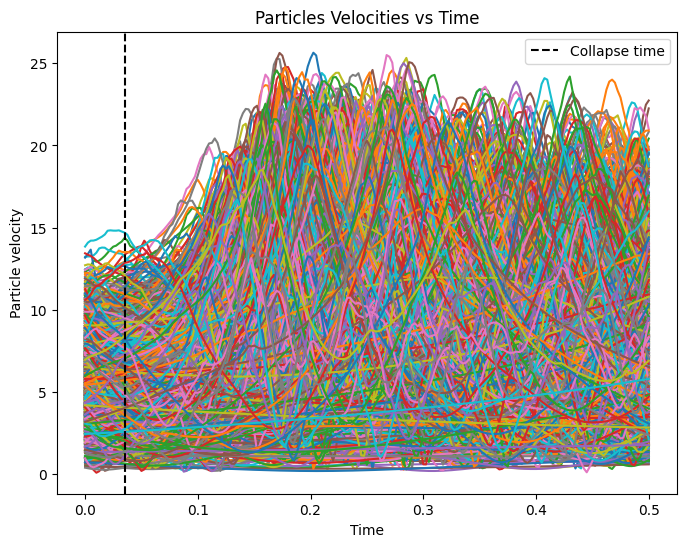

In [15]:
v_ptot = []
for j in range(N):
    v_p = np.zeros(n_outputs)
    
    for i in range(n_outputs):
        v_p[i] = np.sqrt(vx[j+i*N]**2 + vy[j+i*N]**2 + vz[j+i*N]**2)
    
    #r_p.sort()
    #r_p = r_p[::-1]
    v_ptot.append(v_p)

time = np.linspace(0, 0.5, n_outputs)
plt.figure(figsize=(8,6))
for i in range(N):
    plt.plot(time, v_ptot[i])
plt.axvline(0.035, color='black', linestyle='dashed', label='Collapse time')
plt.xlabel('Time')
plt.ylabel('Particle velocity')
#plt.ylim(0,1000)
plt.title('Particles Velocities vs Time')
plt.legend()
plt.show()

## velocities distribution at different times

[  0 100 150 200]


Text(0.5, 0.92, 'velocity distribution, time 19.900265')

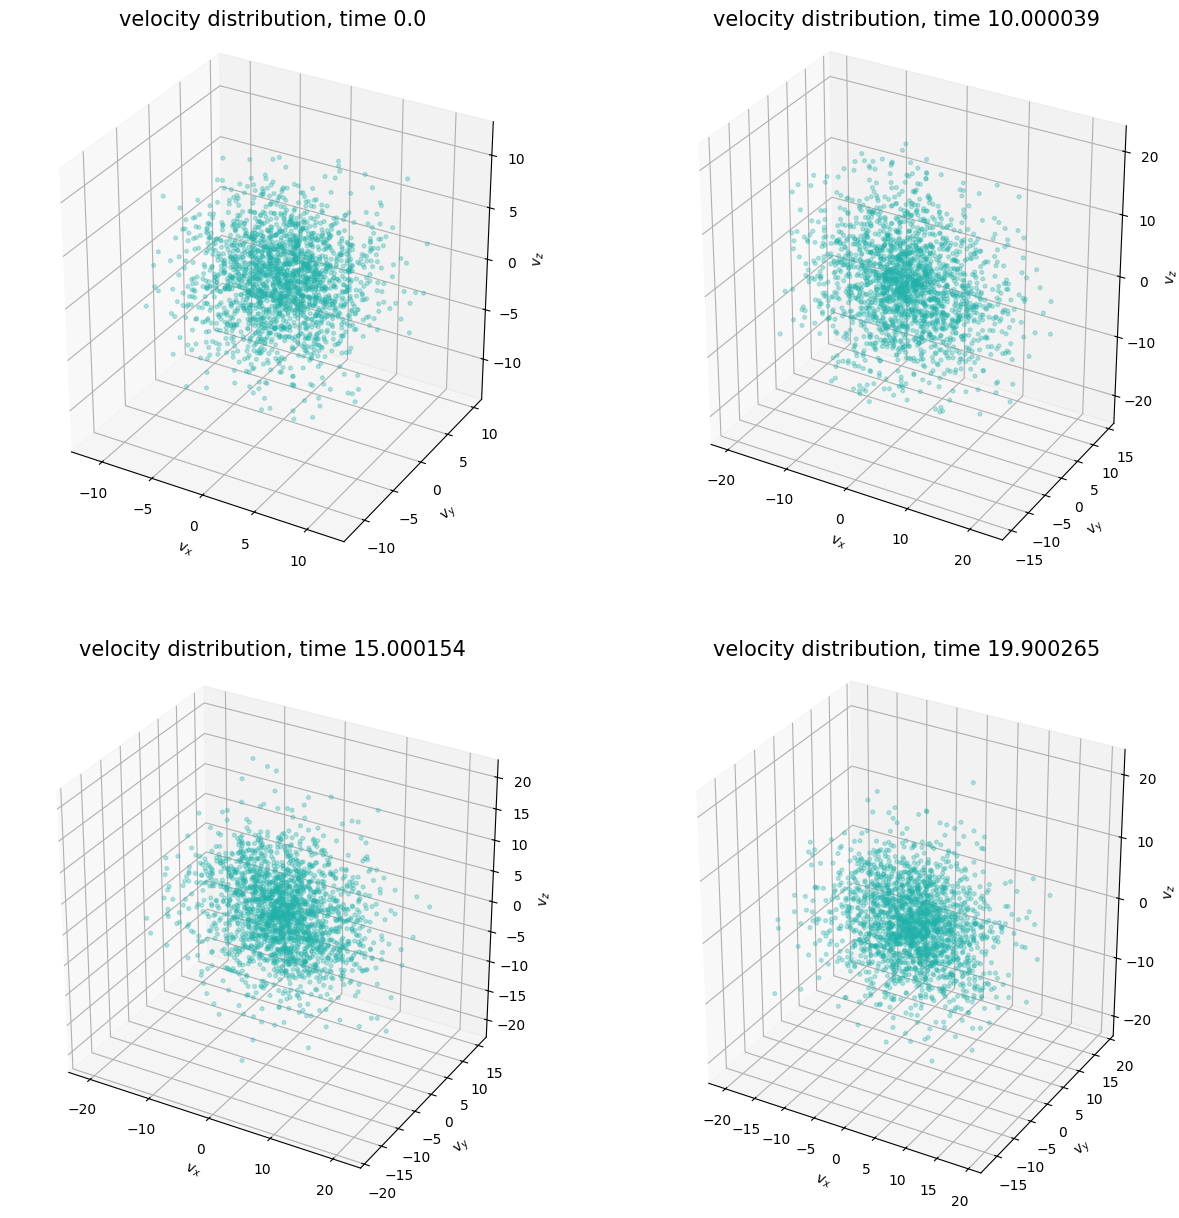

In [16]:
time_indexes = np.array((0, 2*len(data_time)/4, 3*len(data_time)/4, 4*len(data_time)/4-1), dtype = int)
print(time_indexes)
fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2)
#fig.title("Homogeneus galaxy at time zero")
ax0 = fig.add_subplot(gs[0,0], projection='3d')
ax1 = fig.add_subplot(gs[0,1], projection='3d')
ax2 = fig.add_subplot(gs[1,0], projection = '3d')
ax3 = fig.add_subplot(gs[1,1], projection = '3d')


ax0.scatter(vx[time_indexes[0]*N : time_indexes[0]*1+N], vy[time_indexes[0]*N:time_indexes[0]*1+N], vz[time_indexes[0]*N:time_indexes[0]*1+N], c = 'lightseagreen', s=7.5, alpha=0.3)
ax0.set_aspect('equal')
ax0.set_xlabel('$v_x$')
ax0.set_ylabel('$v_y$')
ax0.set_zlabel('$v_z$')
ax0.set_title('velocity distribution, time ' + str(data_time[time_indexes[0]]), fontsize=15)
ax0.axis('equal')



ax1.scatter(vx[time_indexes[1]*N:time_indexes[1]*N+N], vy[time_indexes[1]*N:time_indexes[1]*N+N], vz[time_indexes[1]*N:time_indexes[1]*N+N], c = 'lightseagreen', s=7.5, alpha=0.3)
ax1.set_aspect('equal')
ax1.set_xlabel('$v_x$')
ax1.set_ylabel('$v_y$')
ax1.set_zlabel('$v_z$')
ax1.set_title('velocity distribution, time ' + str(data_time[time_indexes[1]]),fontsize=15)


ax2.scatter(vx[time_indexes[2]*N:time_indexes[2]*N+N], vy[time_indexes[2]*N:time_indexes[2]*N+N], vz[time_indexes[2]*N:time_indexes[2]*N+N], c = 'lightseagreen', s=7.5, alpha=0.3)
ax2.set_aspect('equal')
ax2.set_xlabel('$v_x$')
ax2.set_ylabel('$v_y$')
ax2.set_zlabel('$v_z$')
ax2.set_title('velocity distribution, time ' + str(data_time[time_indexes[2]]), fontsize=15)


ax3.scatter(vx[time_indexes[3]*N:time_indexes[3]*N+N], vy[time_indexes[3]*N:time_indexes[3]*N+N], vz[time_indexes[3]*N:time_indexes[3]*N+N], c = 'lightseagreen', s=7.5, alpha=0.3)
ax3.set_aspect('equal')
ax3.set_xlabel('$v_x$')
ax3.set_ylabel('$v_y$')
ax3.set_zlabel('$v_z$')
ax3.set_title('velocity distribution, time ' + str(data_time[time_indexes[3]-1]), fontsize=15)

#ax.set_xlim(-13, 13)
#ax.set_ylim(-13, 13)
#ax.set_zlim(-13, 13)

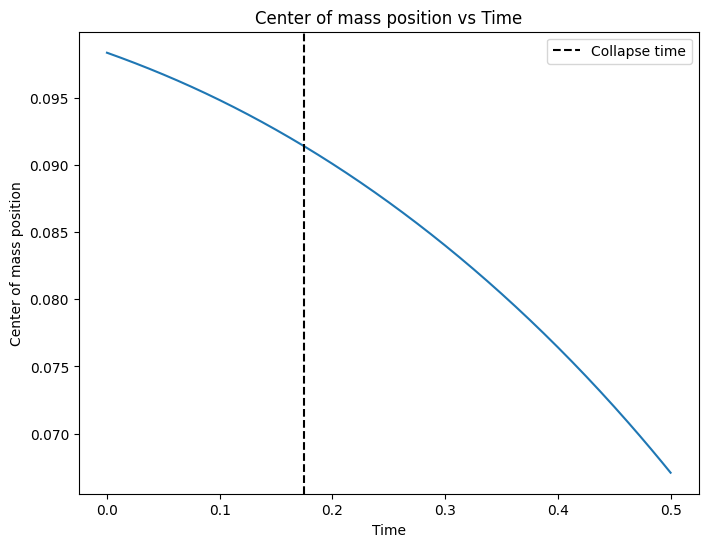

In [17]:
# Center of mass' motion
m=1
r_com = []
for j in range(N):
    r_com_ndx = np.zeros(n_outputs)
    
    for i in range(n_outputs):
        r_com_ndx[i] += r_part[i]*m / (m*N)
    
    r_com.append(r_com_ndx)

time = np.linspace(0, 0.5, n_outputs)
#for i in range(N):
    #plt.plot(time, r_com[i])
plt.figure(figsize=(8,6))
plt.plot(time, r_com[100])
plt.axvline(0.175, color='black', linestyle='dashed', label='Collapse time')
plt.xlabel('Time')
plt.ylabel('Center of mass position')
plt.title('Center of mass position vs Time')
plt.legend()
plt.show()

In [19]:
print(x.shape, y.shape, z.shape, n_outputs)
x_evolution = np.empty((N, n_outputs))
y_evolution = np.empty((N, n_outputs))
z_evolution = np.empty((N, n_outputs))
v_x_evolution = np.empty((N, n_outputs))
v_y_evolution = np.empty((N, n_outputs))
v_z_evolution = np.empty((N, n_outputs))

t = 0
n = 0
for t in range(n_outputs):
    
    for n in range(N):
        #print(n)
        x_evolution[n][t] = x[n + t*N]
        y_evolution[n][t] = y[n + t*N]
        z_evolution[n][t] = z[n + t*N]
        v_x_evolution[n][t] = vx[n + t*N]
        v_y_evolution[n][t] = vy[n + t*N]
        v_z_evolution[n][t] = vz[n + t*N]
        
print(x.shape)

(402000,) (402000,) (402000,) 201
(402000,)


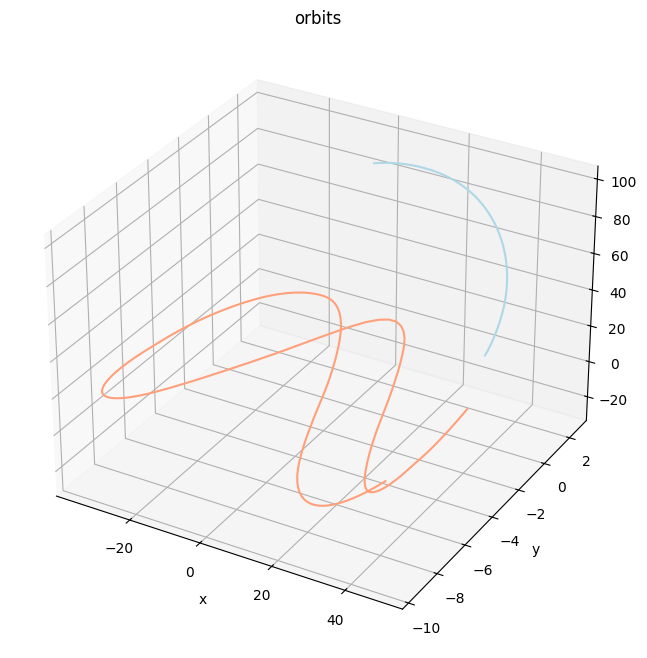

In [21]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

#IF I WANT POINTS:

#ax.scatter(x_evolution[0][:],y_evolution[0][:],z_evolution[0][:], color = 'lightseagreen')
#ax.scatter(x_evolution[1][:],y_evolution[1][:], z_evolution[1][:], color = 'coral')

#IF I WANT THE PLOT OF THE ORBITS
ax.plot(x_evolution[0], y_evolution[0], z_evolution[0], label='1', color = 'lightblue')
ax.plot(x_evolution[1], y_evolution[1], z_evolution[1], label='2', color = 'lightsalmon')
#plt.plot(x3, y3, label='3', color = 'blue')


ax.set_title('orbits')
ax.set_xlabel('x')
ax.set_ylabel('y')
#plt.gca().set_aspect('equal', adjustable='box')
#ax.grid(True)
#ax.legend()
#ax.set_xlim(-5,5)
#ax.set_ylim(-5,5)
#ax.set_zlim(-5,5)

plt.show()

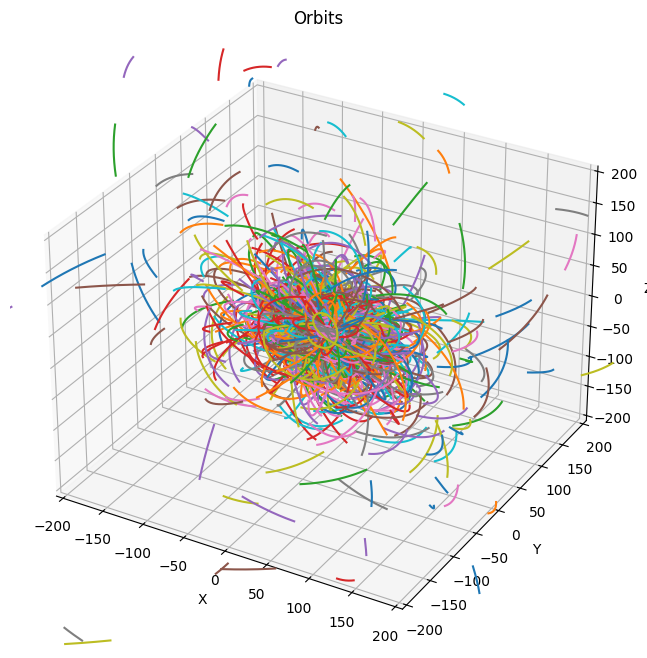

"\nplt.figure(figsize=(10, 8))\n\nfor n in range(n_bodies):\n    #IF I WANT POINTS:\n    #plt.scatter(x[n][:],y[n][:])\n    #IF I WANT THE PLOT OF THE ORBITS\n    plt.plot(x[n], y[n])\n\nplt.title('orbits')\nplt.xlabel('x')\nplt.ylabel('y')\n#plt.gca().set_aspect('equal', adjustable='box')\nplt.grid(True)\n#plt.legend()\nplt.show()\n"

In [22]:
#ALL THE ORBITS


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for orbit_x, orbit_y, orbit_z in zip(x_evolution, y_evolution, z_evolution):
    ax.plot(orbit_x, orbit_y, orbit_z)

ax.set_title('Orbits')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim(-200,200)
ax.set_ylim(-200,200)
ax.set_zlim(-200,200)

plt.show()


'''
plt.figure(figsize=(10, 8))

for n in range(n_bodies):
    #IF I WANT POINTS:
    #plt.scatter(x[n][:],y[n][:])
    #IF I WANT THE PLOT OF THE ORBITS
    plt.plot(x[n], y[n])

plt.title('orbits')
plt.xlabel('x')
plt.ylabel('y')
#plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
#plt.legend()
plt.show()
'''

(2000, 201)


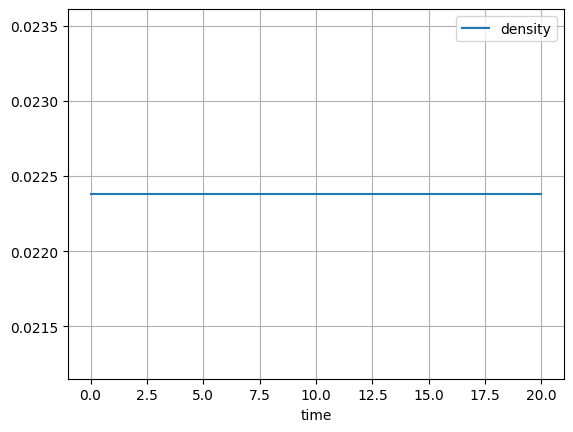

In [23]:
#I want to do a matrix with the radii of each n particle at each time
#x[0][:] is all the positions of the body 0

#print(x[0][:])
#print((x[0][:])**2)
#print((x**2).shape)
r_evolution = np.empty((N, n_outputs))
r_evolution = np.sqrt(x_evolution**2 + y_evolution**2 + z_evolution**2)
print(r_evolution.shape)
#external r for each timelapse.... NON MI CONVINCE TROPPO USARE QUESTO PER LA DENSITÀ... PERCHÈ MI PRENDE LA PARTICELLE CHE SCAPPANO
r_ext = np.max(r_evolution, axis = 0)
r_mean = np.mean(r_evolution, axis = 0)
rho_evolution = N * data_mass[0] / (4/3 * np.pi * (r_ext)**3 )
rho_evolution = N * data_mass[0] / (4/3 * np.pi * (r_mean)**3 )

radius_casual = 40 * np.ones(len(rho_evolution))
rho_evolution = N * data_mass[0] / (4/3 * np.pi * (radius_casual)**3 )

#plt.plot(data_time, r_ext, label = 'external radius')
#plt.plot(data_time, r_mean, label = 'mean radius')
plt.plot(data_time, rho_evolution, label = 'density')
plt.xlabel("time")
#plt.ylabel("radius")
plt.legend()
plt.grid()
#plt.show()


(2000, 201)
545
(1996, 201) 742


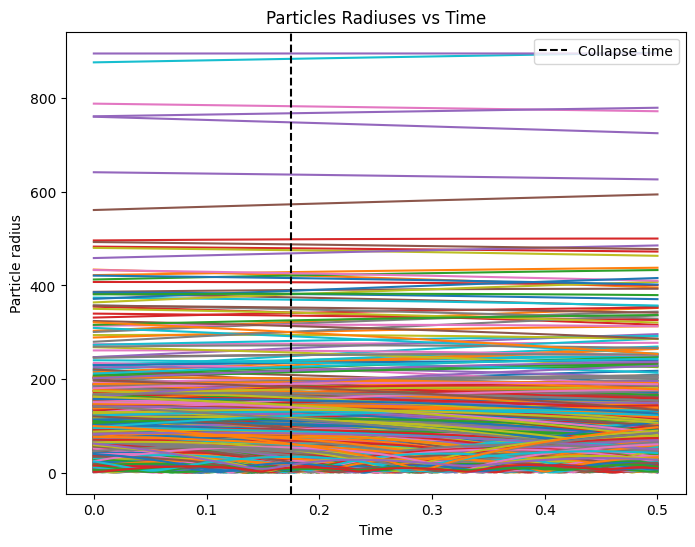

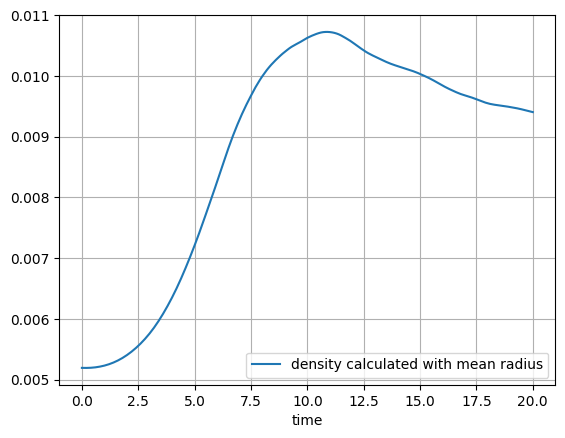

In [24]:

r_evolution = np.empty((N, n_outputs))
r_evolution = np.sqrt(x_evolution**2 + y_evolution**2 + z_evolution**2)
print(r_evolution.shape)
#external r for each timelapse.... NON MI CONVINCE TROPPO USARE QUESTO PER LA DENSITÀ... PERCHÈ MI PRENDE LA PARTICELLE CHE SCAPPANO


# BRAVA MALVI DEL PASSATO! CAMBIAMOLO !
max1_r_fin = np.argmax(r_evolution[:, len(data_time)-1])
print(max1_r_fin)
#The target axis is specified by the third argument axis. In this example, axis=0 targets rows.
r_evol_1 = np.delete(r_evolution, max1_r_fin, 0)

max2_r_fin = np.argmax(r_evol_1[:, len(data_time)-1])
r_evol_2 = np.delete(r_evol_1, max2_r_fin, 0)

max3_r_fin = np.argmax(r_evol_2[:, len(data_time)-1])
r_evol_3 = np.delete(r_evol_2, max3_r_fin, 0)


max4_r_fin = np.argmax(r_evol_3[:, len(data_time)-1])
r_evol_4 = np.delete(r_evol_3, max4_r_fin, 0)

print(r_evol_4.shape, max3_r_fin)

time = np.linspace(0, 0.5, n_outputs)
plt.figure(figsize=(8,6))
for i in range(N-4):
    plt.plot(time, r_evol_4[i])
plt.axvline(0.175, color='black', linestyle='dashed', label='Collapse time')
plt.xlabel('Time')
plt.ylabel('Particle radius')
plt.title('Particles Radiuses vs Time')
plt.legend()
plt.show()


#max1_r_fin = np.argmax(r_evolution[:,N])


r_ext = np.max(r_evol_4, axis = 0)
r_mean = np.mean(r_evol_4, axis = 0)
#rho_evolution = N * data_mass[0] / (4/3 * np.pi * (r_ext)**3 )
rho_evolution = N * data_mass[0] / (4/3 * np.pi * (r_mean)**3 )

#radius_casual = 40 * np.ones(len(rho_evolution))
#rho_evolution = N * data_mass[0] / (4/3 * np.pi * (radius_casual)**3 )

#plt.plot(data_time, r_ext, label = 'external radius')
#plt.plot(data_time, r_mean, label = 'mean radius')
plt.plot(data_time, rho_evolution, label = 'density calculated with mean radius')
plt.xlabel("time")
#plt.ylabel("radius")
plt.legend()
plt.grid()
#plt.show()


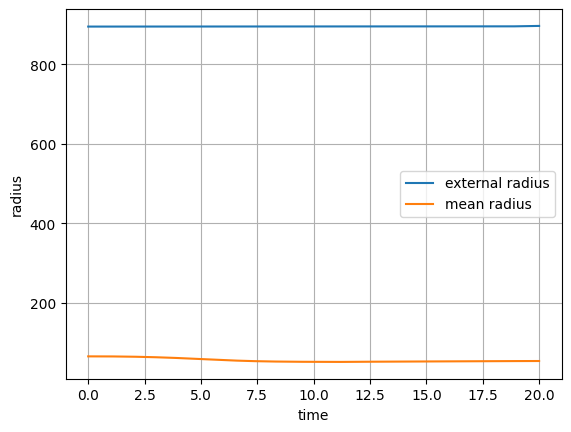

In [25]:
plt.plot(data_time, r_ext, label = 'external radius')
plt.plot(data_time, r_mean, label = 'mean radius')
plt.xlabel("time")
plt.ylabel("radius")
#plt.ylim(0,5000)
plt.legend()
plt.grid()

# Density

In [26]:
# ATTENZIONE CAMBIARE SE HAI CAMBIATO I PARAMETRIIIIII
b = 45
radii = np.linspace(0.1, r_ext[0], 1000)
density_analytical = 3 * np.sum(data_mass) / (4 * np.pi * b**3 ) * (1 / (1 + radii**2 / (b**2) ) )**(5/2)


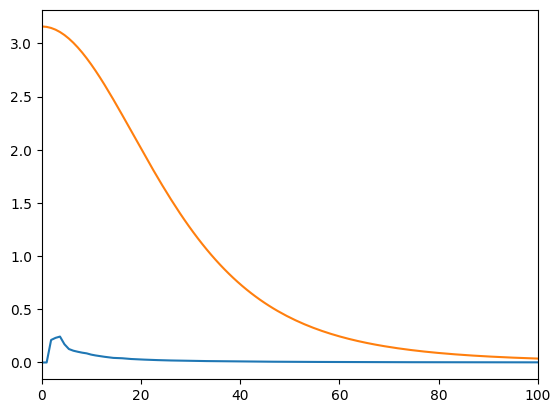

895.0655960223129


In [27]:
#let's do the first one first
density= []
for R in radii:
    i = 0
    for r_p in r_evolution[:,0]:    
        if (r_p <= R):
            i = i+1
    density.append(i * data_mass[0] / (4/3 * np.pi * R**3)) 
#plt.hist(density,int(n_bodies**0.5))
plt.show()
plt.plot(radii, density)
plt.plot(radii, density_analytical)
plt.xlim(0,100)

plt.show()
print(r_ext[0])

# we count them, so for a litte number of particles might scatter the distributionn because of the poissonian error ( proportinal to sqrt(N))

## oppure

In [ ]:
def density_estimator(r_min, r_max, r_t): 
    
    V = 4/3 * np.pi * (r_max**3 - r_min**3)
    N_particles = len(r_t[r_t < r_max]) - len(r_t[r_t < r_min])
    M_within = N_particles * m
    
    return M_within / V


In [ ]:
R = [0.1, 0.2, 0.5, 0.9, 1, 1.5, 2, 3, 4, 5]

rho_0 = []

for i in range(0, len(R) -1):
    
    rho_0.append(density_estimator(R[i], R[i+1], r_ptot))


In [ ]:
plt.figure(figsize = (6,6))
plt.scatter(R[:-1], rho_0, c='k', label=r'initial $\rho$')
plt.plot(rs_grid, rho_theor, c='C0', label=r'theoretical $\rho$')
plt.title(r"$\rho(r)$", fontsize=16)
plt.xlabel(r"$r$", fontsize=13)
plt.ylabel(r"$\rho$", fontsize=13)
plt.legend()
plt.margins(0.05, 0.05)
plt.show()

# Lagrangian radius
The Lagrangian radius is the radius from the centre at which we find 80% of the entire mass of our distribution. If the sphere is stable, then this quantity should be a constant. We decided to see how close we are to the actual radius 'fixed' at the beginning. We then evaluate the absolute deviation and derive the relative error.

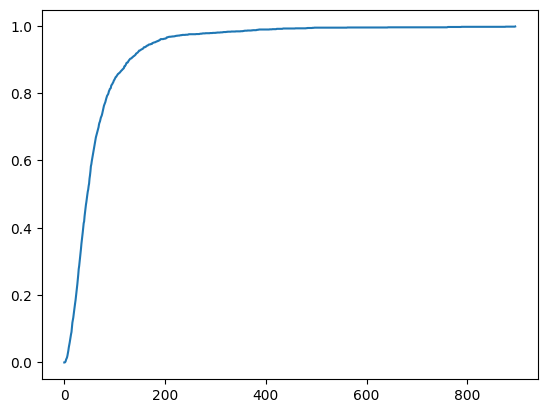

895.0655960223129


In [28]:
mass_percentage= []
for R in radii:
    i = 0
    for r_p in r_evolution[:,0]:    
        if (r_p <= R):
            i = i+1
    mass_percentage.append(i * data_mass[0] / (N*data_mass[0])) 
#plt.hist(density,int(n_bodies**0.5))
plt.show()
plt.plot(radii, mass_percentage)
#plt.xlim(0,100)

plt.show()
print(r_ext[0])

# we count them, so for a litte number of particles might scatter the distributionn because of the poissonian error ( proportinal to sqrt(N))

In [29]:

def lagrangian_radiuses_fixed_t (radii, r_evolution, time_index):
    mass_percentage= []
    lagr_02 = 0
    lagr_04 = 0
    lagr_06 = 0
    lagr_08 = 0
    
    for R in radii:
        i = 0
        for r_p in r_evolution[:,time_index]:    
            if (r_p <= R):
                i = i+1
        #print(i * data_mass[0] / (N*data_mass[0]))
        if ( ((i * data_mass[0] / (N*data_mass[0]) )> 0.19) & ((i * data_mass[0] / (N*data_mass[0]) < 0.21 )) ): 
            lagr_02 = R
        if ( ((i * data_mass[0] / (N*data_mass[0])) > 0.39) & ((i * data_mass[0] / (N*data_mass[0]) < 0.41 )) ): 
            lagr_04 = R
        if ( ((i * data_mass[0] / (N*data_mass[0])) > 0.59) & ((i * data_mass[0] / (N*data_mass[0]) < 0.61 )) ):
            lagr_06 = R
        if ( ((i * data_mass[0] / (N*data_mass[0])) > 0.79) & ((i * data_mass[0] / (N*data_mass[0]) < 0.81)) ):
            lagr_08 = R
            
    return lagr_02, lagr_04, lagr_06, lagr_08
 

In [30]:
lagr_02i, lagr_04i, lagr_06i, lagr_08i = lagrangian_radiuses_fixed_t(radii, r_evolution, time_index= 0)
print(lagr_02i, lagr_04i, lagr_06i, lagr_08i)

24.2882593519544 37.72618121415129 55.643410363747144 89.68614574797925


In [31]:
# to find the lagrangian radius from theory

def lagr_th(b, quantile): 
    rad3_cb3 = (quantile * b**3)**(1/3)
    return rad3_cb3 / (1 - 1 / b**2 * rad3_cb3**2)**(1/2)

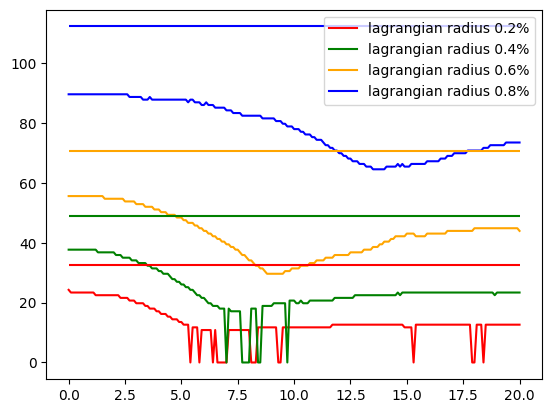

In [32]:
# let's put this in a for cycle over time and save where the mass percentace is 0.2, 0.4, 0.6, 0.8
lagr_02 = []
lagr_04 = []
lagr_06 = []
lagr_08 = []
c = ['red', 'green', 'orange', 'blue']
for t in range(len(data_time)):
    lagr_02i, lagr_04i, lagr_06i, lagr_08i = lagrangian_radiuses_fixed_t(radii, r_evolution, time_index= t)
    lagr_02.append(lagr_02i)
    lagr_04.append(lagr_04i)
    lagr_06.append(lagr_06i)
    lagr_08.append(lagr_08i)

plt.plot(data_time, lagr_02, label = "lagrangian radius 0.2%", c = c[0])
plt.plot(data_time, lagr_04, label = "lagrangian radius 0.4%", c = c[1])
plt.plot(data_time, lagr_06, label = "lagrangian radius 0.6%", c = c[2])
plt.plot(data_time, lagr_08, label = "lagrangian radius 0.8%", c = c[3])


for j, i in zip([0.2, 0.4, 0.6, 0.8], range(0, 4)):
    
    plt.hlines(lagr_th(b, j), 0, np.max(data_time), color=c[i])


plt.legend()
    